### Tf-keras 和 keras 区别
- tf.kears

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [10]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_valid_s=scaler.fit_transform(x_valid)
x_test_scaled=scaler.transform(x_test)

NameError: name 'xa_train' is not defined

In [15]:
# tf.keras.models.Sequential()

# model=keras.models.Sequential([
#     keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
#     keras.layers.Dense(1),
# ])

# 函数式API  功能API
input=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)

concat=keras.layers.concatenate([input,hidden2])
output=keras.layers.Dense(1)(concat)

model=keras.models.Model(inputs=[input],outputs=[output])

model.summary()
model.compile(loss='mean_squared_error',optimizer="sgd")

callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_3[0][0]                

In [17]:
model.layers

In [19]:
history=model.fit(x_train_s,y_train,epochs=100,callbacks=callbacks,validation_data=(x_valid_s,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 103us/sample - loss: 0.9878 - val_loss: 11.3113
Epoch 2/100
11610/11610 [==============================] - 1s 51us/sample - loss: 65.5112 - val_loss: 425.0656
Epoch 3/100
11610/11610 [==============================] - 1s 50us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 1s 53us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 1s 51us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 1s 50us/sample - loss: nan - val_loss: nan


In [17]:
type(history)

tensorflow.python.keras.callbacks.History

In [18]:
history.history

{'loss': [2.3026301052093507,
  2.3026511717016045,
  2.3026439739227293,
  2.3026544590343128,
  2.3026424996462733,
  2.302653493673151,
  2.3026494102131236,
  2.3026479800137607,
  2.3026561866760256,
  2.3026449316198176],
 'accuracy': [0.10052727,
  0.09758182,
  0.1,
  0.096745454,
  0.09823637,
  0.099436365,
  0.09952727,
  0.09870909,
  0.09690909,
  0.096981816],
 'val_loss': [2.3028464687347414,
  2.302828812408447,
  2.3028252712249757,
  2.302771685409546,
  2.3026701526641844,
  2.3027883476257323,
  2.302762525558472,
  2.3028563999176024,
  2.3028726272583007,
  2.3027096755981447],
 'val_accuracy': [0.0914,
  0.0976,
  0.098,
  0.0914,
  0.0914,
  0.0914,
  0.0914,
  0.1008,
  0.098,
  0.1012]}

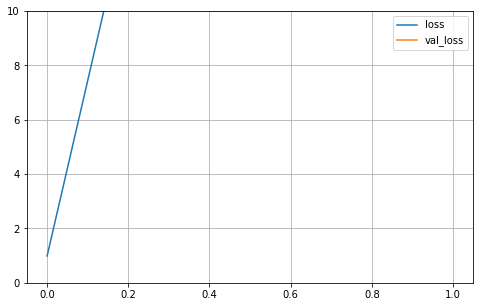

In [21]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,10)
    plt.show()
    
plot_learning_curves(history)